# **This is Adwait Agashe's solution the the internship application coding test for Lannet Technologies**


### Question 1 solution:

In [558]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns
from scipy import stats
from collections import Counter
%matplotlib inline

In [559]:
#importing created file
data = pd.read_csv('https://raw.githubusercontent.com/agasheadwait/LannetTechnologies/master/data.csv')


In [560]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date1    1000 non-null   object 
 1   date2    1000 non-null   object 
 2   date3    1000 non-null   object 
 3   date 4   1000 non-null   object 
 4   date 5   1000 non-null   object 
 5   date 6   1000 non-null   object 
 6   date 7   1000 non-null   object 
 7   Dummy 1  1000 non-null   object 
 8   Dummy 2  1000 non-null   int64  
 9   Dummy 3  1000 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


In [561]:
#viewing head to see date format and setting incorrect date value for first entry to check for errors
data['date1'][0] = 'incorrect date'
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date1,date2,date3,date 4,date 5,date 6,date 7,Dummy 1,Dummy 2,Dummy 3
0,incorrect date,01/17/1967,2/28/2013,04 Jun 2010,15-01-11,06-10-18,June 05 2018,a,1334,0.944138
1,8/19/10,04/22/1966,6/15/2014,08 Jul 2017,16-04-3,04-02-15,October 07 2013,a,1335,0.280345
2,3/14/10,09/30/1965,5/28/2012,09 Mar 2013,16-05-9,06-04-17,January 01 1970,a,1336,0.685173
3,9/4/10,05/25/1966,8/10/2014,10 May 2013,14-03-11,07-12-12,January 01 1970,a,1337,0.650565
4,8/18/10,04/09/1966,12/28/2014,04 May 2013,15-04-2,10-03-13,March 05 2014,a,1338,0.373480


In [562]:
data.dtypes

date1       object
date2       object
date3       object
date 4      object
date 5      object
date 6      object
date 7      object
Dummy 1     object
Dummy 2      int64
Dummy 3    float64
dtype: object

In [563]:
#Convert date columns to datetime object

def ConvertDatetime(data):
  df = data.copy() #Creating a copy of data so as to not modify it before hand
  for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_datetime(df[col],errors = 'coerce')  # Converting all object columns in copied dataframe to datetime columns and fillinf with NaT if error occurs 
        except ValueError:
            pass
  for col in df.columns:
    if df[col].dtype == 'datetime64[ns]':
      df[col] = df[col].apply(lambda x: x if not pd.isnull(x) else None) #Converting NaT values to None for easier removal of columns
    if df[col].isnull().sum() == len(df[col]):
      df.drop(col,inplace=True,axis=1) #Drop columns if all values are None --> If column has no Dates
  return df #returning the modified copy of our data
    

In [564]:
def MakeDifference(data):
  df=ConvertDatetime(data) #Gets modified copy of our data
  for col in df.columns:
    data[col] = df[col] #Changes the columns of our original data to datetime columns if they have dates present
  date_columns=[]
  for col in data.columns:
    if data[col].dtype == 'datetime64[ns]':
      date_columns.append(col)  ## make a list of columns that are datetime
  date_combo = list(combinations(date_columns,2)) # make all possible pairs from our datetime columns
  for columns in date_combo:
    data['{}-{}'.format(columns[0],columns[1])] = data[columns[0]] - data[columns[1]] # Appending a difference column to our dataframe
MakeDifference(data)


In [565]:
data.head()

,date1,date2,date3,date 4,date 5,date 6,date 7,Dummy 1,Dummy 2,Dummy 3,date1-date2,date1-date3,date1-date 4,date1-date 5,date1-date 6,date1-date 7,date2-date3,date2-date 4,date2-date 5,date2-date 6,date2-date 7,date3-date 4,date3-date 5,date3-date 6,date3-date 7,date 4-date 5,date 4-date 6,date 4-date 7,date 5-date 6,date 5-date 7,date 6-date 7
0,NaT,1967-01-17,2013-02-28,2010-06-04,2011-01-15,2018-06-10,2018-06-05,a,1334,0.944138,NaT,NaT,NaT,NaT,NaT,NaT,-16844 days,-15844 days,-16069 days,-18772 days,-18767 days,1000 days,775 days,-1928 days,-1923 days,-225 days,-2928 days,-2923 days,-2703 days,-2698 days,5 days
1,2010-08-19,1966-04-22,2014-06-15,2017-07-08,2003-04-16,2015-04-02,2013-10-07,a,1335,0.280345,16190 days,-1396 days,-2515 days,2682 days,-1687 days,-1145 days,-17586 days,-18705 days,-13508 days,-17877 days,-17335 days,-1119 days,4078 days,-291 days,251 days,5197 days,828 days,1370 days,-4369 days,-3827 days,542 days
2,2010-03-14,1965-09-30,2012-05-28,2013-03-09,2009-05-16,2017-06-04,1970-01-01,a,1336,0.685173,16236 days,-806 days,-1091 days,302 days,-2639 days,14682 days,-17042 days,-17327 days,-15934 days,-18875 days,-1554 days,-285 days,1108 days,-1833 days,15488 days,1393 days,-1548 days,15773 days,-2941 days,14380 days,17321 days
3,2010-09-04,1966-05-25,2014-08-10,2013-05-10,2011-03-14,2012-07-12,1970-01-01,a,1337,0.650565,16173 days,-1436 days,-979 days,-191 days,-677 days,14856 days,-17609 days,-17152 days,-16364 days,-16850 days,-1317 days,457 days,1245 days,759 days,16292 days,788 days,302 days,15835 days,-486 days,15047 days,15533 days
4,2010-08-18,1966-04-09,2014-12-28,2013-05-04,2002-04-15,2013-10-03,2014-03-05,a,1338,0.373480,16202 days,-1593 days,-990 days,3047 days,-1142 days,-1295 days,-17795 days,-17192 days,-13155 days,-17344 days,-17497 days,603 days,4640 days,451 days,298 days,4037 days,-152 days,-305 days,-4189 days,-4342 days,-153 days


###The function is able to deal with incorrect or missing values and only modifies the columns that contain dates. Also creates new columns that have difference in dates

### Question 2 solution:

In [566]:
data = pd.read_csv('https://raw.githubusercontent.com/agasheadwait/LannetTechnologies/master/q2_data.csv')
data.drop('Unnamed: 0',inplace=True,axis=1)

In [567]:
data['Price'][0] = None  #Including null value to check for errors
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [568]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6018 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [569]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6018.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.480753
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,11.188403
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [570]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [571]:
def findContinuous(data):
  df = data._get_numeric_data()  #Get only numeric columns as object columns may have distinct values like name which are not continuous
  for col in df.columns:
    if not df[col].nunique()>len(df)/50:   #Threshold to decide if columns if to be considered categorial or continuous. This can be varied to optimize the code firther depending on data
      df.drop(col,inplace=True,axis=1)  #Drop numeric columns if they do not satisfy threshold as we wll consider them categorical
  return df
continuous_df = findContinuous(data)
print(continuous_df.columns)

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price'], dtype='object')


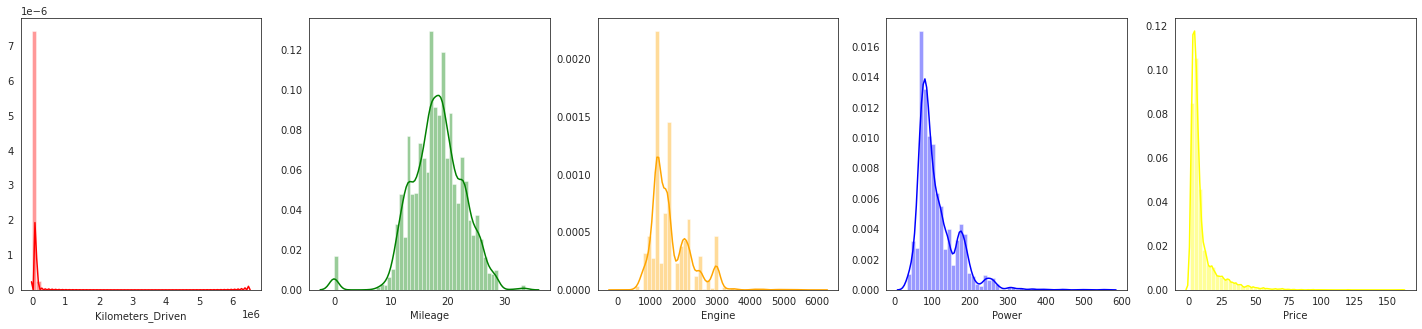

In [572]:
sns.set_style('white')
plt.figure(figsize=(25,5))
plt.subplot(1,5,1)
sns.distplot(data['Kilometers_Driven'],color='red')
plt.subplot(1,5,2)
sns.distplot(data['Mileage'],color='green')
plt.subplot(1,5,3)
sns.distplot(data['Engine'],color='orange')
plt.subplot(1,5,4)
sns.distplot(data['Power'],color='blue')
plt.subplot(1,5,5)
sns.distplot(data['Price'],color='yellow')
plt.show()

In [573]:
def dropOutliers(data):
  df = findContinuous(data) ##Gets copy of continuous columns
  for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Find the inter quartile range
    isOutlier = df[col][((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]  #Marks rows as outliers in the column if the are not within the range
    df.drop(list(isOutlier.index),inplace=True) #Updates the continuous variable dataset
  data = data.iloc[df.index] # Update the complete dataset
  return data #return modified data
data = dropOutliers(data)
data  #Null values are kept intact

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


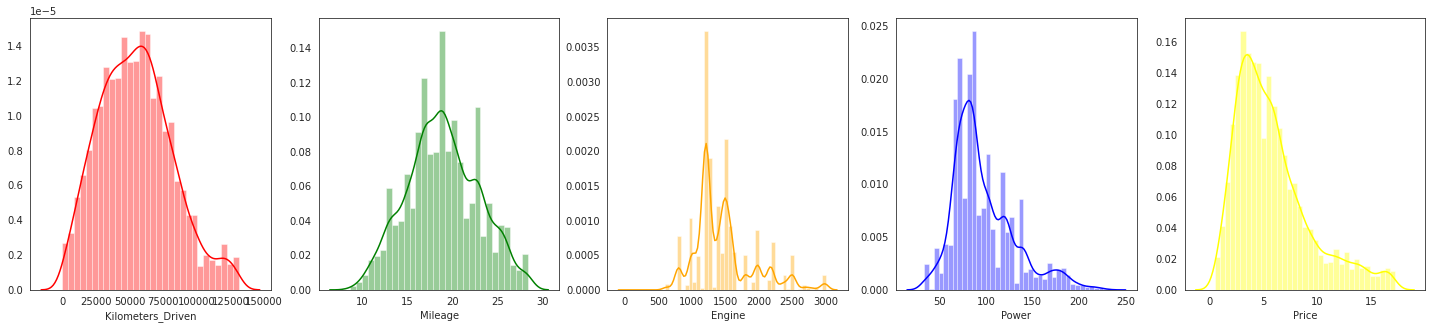

In [574]:
#Plotting the modified data after removing outliers
sns.set_style('white')
plt.figure(figsize=(25,5))
plt.subplot(1,5,1)
sns.distplot(data['Kilometers_Driven'],color='red')
plt.subplot(1,5,2)
sns.distplot(data['Mileage'],color='green')
plt.subplot(1,5,3)
sns.distplot(data['Engine'],color='orange')
plt.subplot(1,5,4)
sns.distplot(data['Power'],color='blue')
plt.subplot(1,5,5)
sns.distplot(data['Price'],color='yellow')
plt.show()

## The function is able to find continuous columns based on the threshold and deals with outliers by removing them. 
## It also does not give an error for null values.

### Question 3 solution:

In [581]:
data = pd.read_csv('https://raw.githubusercontent.com/agasheadwait/LannetTechnologies/master/nasa.csv')

In [576]:
data['Absolute Magnitude'][0] = None
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,NaN,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [577]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4686 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [578]:
data.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4686.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.268007,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,1.179881e+12,13.970811,50294.919829,31251.307268,0.256778,99.886706,3.841347e+07,2.386902e+07,28.300619,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.891264,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,1.981540e+11,7.293223,26255.601377,16314.209644,0.145798,56.715493,2.181110e+07,1.355279e+07,38.299668,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,7.889472e+11,0.335504,1207.814804,750.489149,0.000178,0.069194,2.660989e+04,1.653462e+04,1.000000,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,1.015574e+12,8.432865,30358.313370,18863.475327,0.133420,51.900211,1.995928e+07,1.240212e+07,9.000000,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,1.203062e+12,12.917889,46504.401181,28896.026390,0.265029,103.096123,3.964771e+07,2.463595e+07,16.000000,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,1.355558e+12,18.077649,65079.535405,40437.892430,0.384154,149.435921,5.746863e+07,3.570935e+07,31.000000,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,114294.420501,1.473318e+12,44.633747,160681.487851,99841.227826,0.499884,194.454910,7.478160e+07,4.646713e+07,611.000000,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


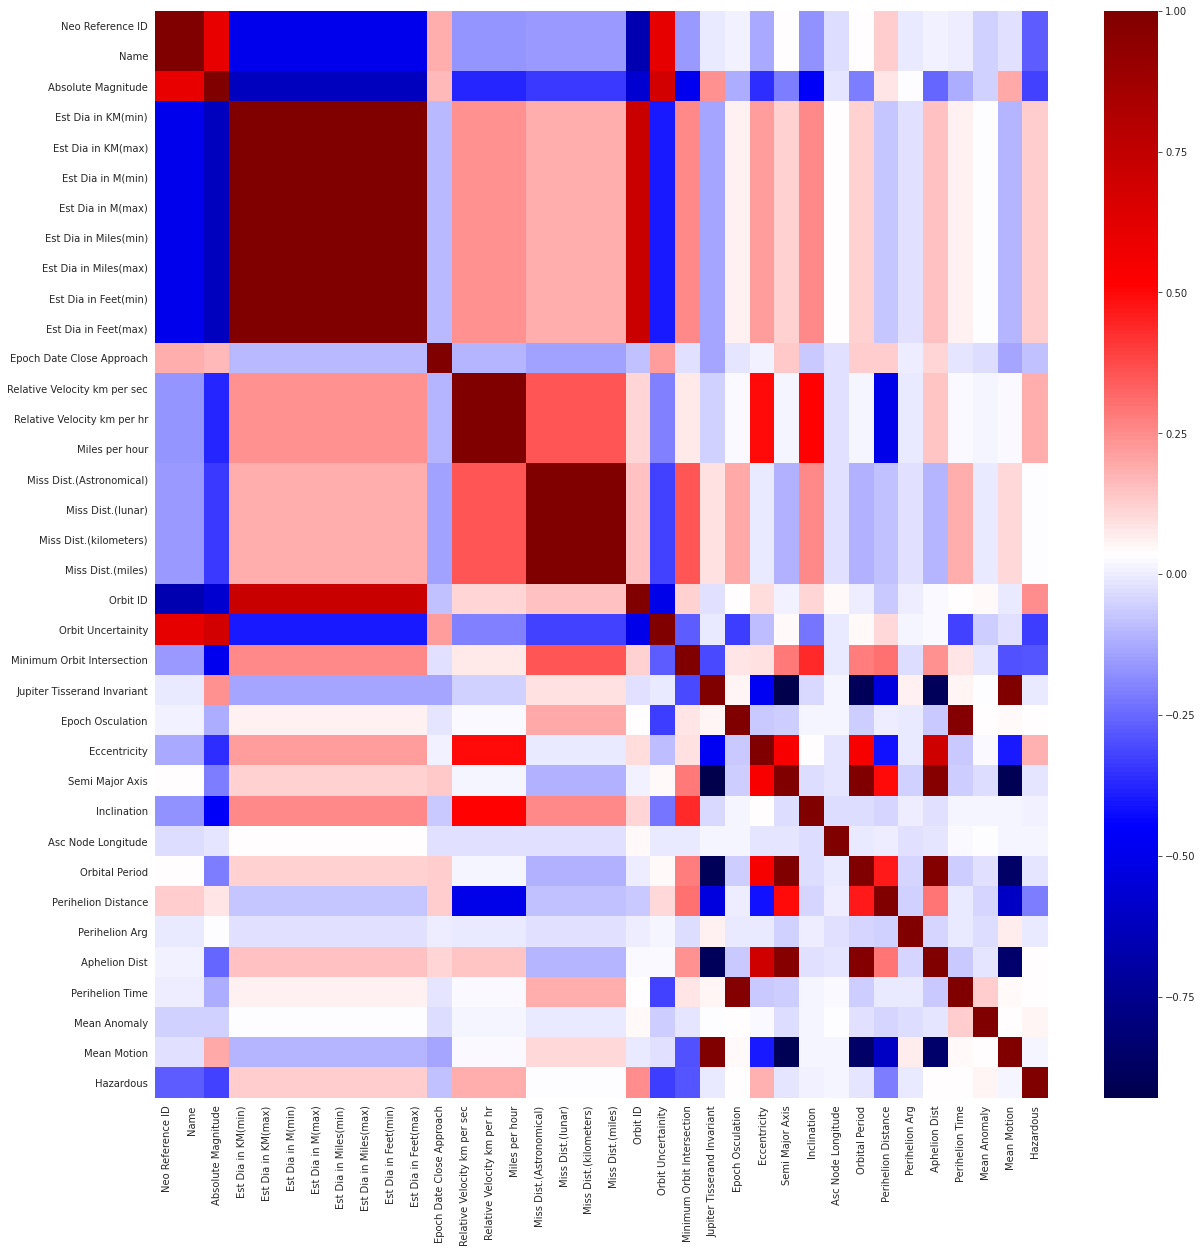

In [583]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap='seismic')

In [584]:
def dropCorr(data, threshold=0.85):
  df = data.copy() #Making copy of data
  df_corr = df.corr(method = 'pearson') #finding correlation matrix
  corr_list=[]
  corr_column=[]
  for col in df_corr.columns:
    for row in df_corr.columns:
      if df_corr[col][row]>=threshold and row!=col:
        corr_column.append(col)  # Appending columns if correlation>threshold and if row!=col as each column has correlation of 1 with itself
  corr_dict = list(Counter(corr_column).items()) #making list of tuples with count of how many times column occurs in above list
  dropping_column = max(corr_dict,key=lambda x: x[1])[0]  
  df.drop(dropping_column,inplace=True,axis=1)  #Dropping column that occurs maximum number of times
  new_corr = df.corr(method = 'pearson')
  for col in new_corr.columns:
    for row in new_corr.columns:
      if row!=col:
        corr_list.append(new_corr[col][row])#Finding new list of correlation values
  return (df,corr_list)#returning modified dataframe and list




In [585]:
threshold = 0.85
corr_list = []
data_corr = data.corr()
for col in data_corr.columns:
    for row in data_corr.columns:
      if row!=col:
        corr_list.append(data_corr[col][row]) #Making list of correlation values
while max(corr_list)>=threshold:  #Continue till all correlations <0.85
  data,corr_list = dropCorr(data,threshold)

data.shape #Shape shows that we removed 17 columns

(4687, 23)

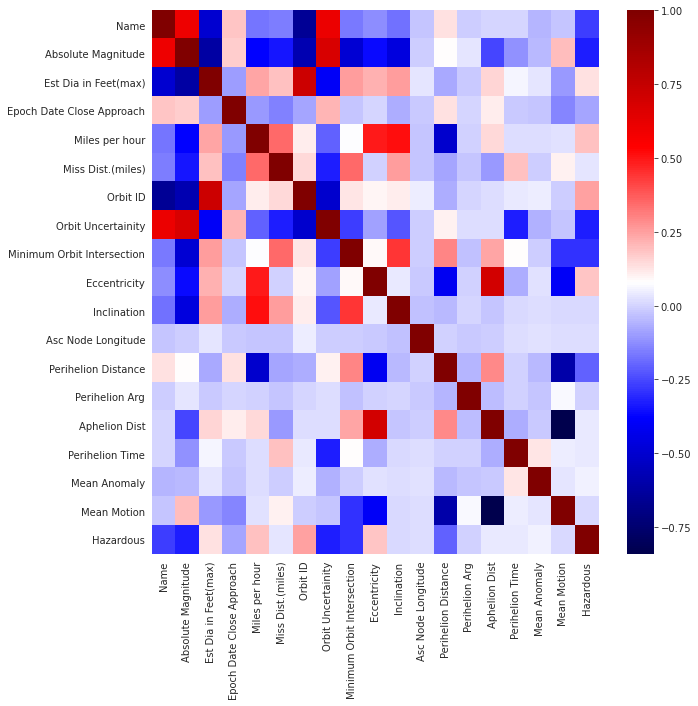

In [586]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap='seismic')

## The function is able to find columns with high correlation and remove them till condition is satisfied and minimum possible columns are removed. 
## It also does not give an error for null values.

# **END**


---


